In [3]:
import wind 
import sigma_data as sd
import math 
import numpy as np
import matplotlib.pyplot as plt
r0=2.818E-15

ModuleNotFoundError: No module named 'wind'

In [22]:
#to bring in data to use
data = []
for line in open("H2 data"):
    fields = [float(s) for s in line.split()]
    
    data.append(fields)

In [23]:
#cash-karp paramters for fifth-order runga-kutta integration 
aS=np.array([0,1/5,3/10,3/5,1,7/8])
cS=np.array([37/378,0,250/621,125/594,0,512/1771])
cSstar=np.array([2825/27648,0,18575/48384,13525/55296,277/14336,1/4])

In [24]:
def densityAndVelocity (v_not,v_terminal,r_star,m_wind,r):
    v_not=v_not*100000  #cm/second 
    v_terminal=v_terminal*100000 # terminal velocity cm/second 
    m_wind=m_wind*1.989E33/3.154E7 
    
    v=v_not+(v_terminal-v_not)*(1-(r_star/r)) #equation 1
    rho = m_wind/(4*math.pi*r**2*v) #equation 2
    return rho



In [25]:

def LambdaX(rho,sigma):
    lambda1=1/rho*sigma #equation 4
    
    #print (lambda1)
    return lambda1

In [26]:
def length (p):
    length=math.sqrt(p[0]**2+p[1]**2+p[2]**2)
    return length

In [27]:
#equation 33 taking in a list of thetas to print a list of epsilone primes
def compton_effect(THETA,epsilon):


    for i in THETA:
        epsilon_prime=epsilon/1+(epsilon)*(1-np.cos(THETA))
        
    return epsilon_prime
    

In [28]:
#equation 33 
def compton_formula(THETA,epsilon):


    
    epsilon_prime=epsilon/(1+epsilon*(1-np.cos(THETA)))
        
    return epsilon_prime

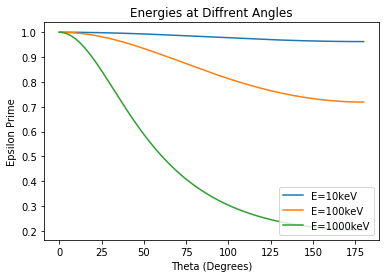

In [29]:
#energy=np.random.rand(5)*2E-3
for energy in [1E-2,1E-1,1] :
#energy=2.4E-1
    me=.511 #MeV
    epsilon=energy/(me)
    THETA=np.linspace(0,math.pi,1000)
    x=np.cos(THETA)

    y=compton_formula(THETA,epsilon)/epsilon

#print(x)
#print(y)
    
    plt.plot((THETA*180/math.pi),y,label="E=%dkeV"%(1000*energy))
plt.legend(loc="lower right")
plt.ylabel('Epsilon Prime')
plt.xlabel('Theta (Degrees)')
plt.title('Energies at Diffrent Angles')
plt.show()


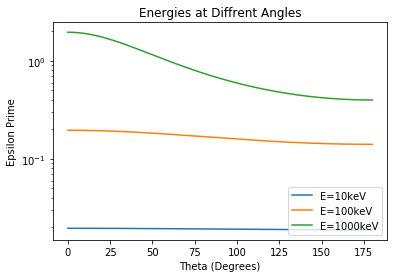

In [30]:
#energy=np.random.rand(5)*2E-3
for energy in [1E-2,1E-1,1] :
#energy=2.4E-1
    me=.511 #MeV
    epsilon=energy/(me)
    THETA=np.linspace(0,math.pi,1000)
    x=np.cos(THETA)

    y=compton_formula(THETA,epsilon)

#print(x)
#print(y)
    
    plt.plot((THETA*180/math.pi),y,label="E=%dkeV"%(1000*energy))
plt.legend(loc="lower right")
plt.ylabel('Epsilon Prime')
plt.xlabel('Theta (Degrees)')
plt.yscale('log')
plt.title('Energies at Diffrent Angles')
plt.show()

In [2]:
#energy=np.random.rand(5)*2E-3
for THETA in [0,math.pi/4,math.pi/2,3*math.pi/4,math.pi] :
    energy=np.linspace(.01,1,1000)
    me=.511 #MeV
    epsilon=energy/(me)
    
    

    y=compton_formula(THETA,epsilon)/epsilon

#print(x)
#print(y)
    
    plt.plot((energy),y,label=r'$\Theta\;[^\circ]$'%THETA*180/math.pi)
plt.legend(loc="lower right")
plt.ylabel('Epsilon Prime')
plt.xlabel('Energy (keV)')
plt.title('Scattering Angles at Different Energies')
plt.xscale('log')
plt.show()

NameError: name 'math' is not defined

In [46]:

def compton_graphing(theta,energy):
    
    epsilon=energy/.511
    epsilon_prime=compton_formula(theta,epsilon)
    IQU_prime=fano(theta,epsilon_prime,epsilon,np.array([1,0,0]))
    
    
    #print(theta,IQU_prime)
    
    return pol_fraction(IQU_prime)



    

In [47]:
for energy in [1E-2,1E-1,.511,1] :
    pol_f=[]
    Thetas=np.linspace(0,np.pi,1000)
    for theta in Thetas:
        pol_f.append(compton_graphing(theta,energy))
    
        
        
    plt.plot(Thetas*180/np.pi,np.array(pol_f),label="E=%dkeV"%(1000*energy))             
plt.ylabel('Polrization Fraction')
plt.xlabel(r'$\Theta\;[^\circ]$')
plt.legend(loc="lower right")


TypeError: 'int' object is not callable

In [48]:
def fano(THETA,epsilon_prime,epsilon,IQU):
    r0=2.818E-15
    #equation 36
    #d_sigma_d_omega=1/2*(r0**2)*((epsilon/epsilonprim)**2)*((epsilon/epsilonprim)+(epsilonprime/epsilon)-2*math.sin(THETA)**2*math.sin(psi)**2)
    Tkn_matrix=np.array([[1+math.cos(THETA)**2+(epsilon-epsilon_prime)*(1-math.cos(THETA)) , math.sin(THETA)**2 , 0],[math.sin(THETA)**2,1+math.cos(THETA)**2,0],[0,0,2*math.cos(THETA)]])
    #print(Tkn_matrix)                                                      
    Tkn=1/2*(r0**2)*((epsilon/epsilon_prime)**2)*Tkn_matrix
    return np.dot(Tkn,IQU)

In [49]:
def pol_fraction(IQU):
    #equation 27
    return math.sqrt(IQU.item(1)**2+IQU.item(2)**2)/IQU.item(0)
    

In [38]:
def weight_prime(energy,THETA,psi,p):
    me=.511 #MeV
    epsilon=energy/(me)
    epsilon_prime=compton_formula(THETA,epsilon)
    
    I=1
    Q=p*math.cos(2*psi)
    U=-p*math.sin(2*psi)
    IQU=np.array([I,Q,U])
    
    IQU_prime=fano(THETA,epsilon_prime,epsilon,IQU)
    
    #equation 37
    return (4*math.pi*IQU_prime[0])/sigma_kn(epsilon)
    

Text(0.5, 0, '$\\Theta\\;[^\\circ]$')

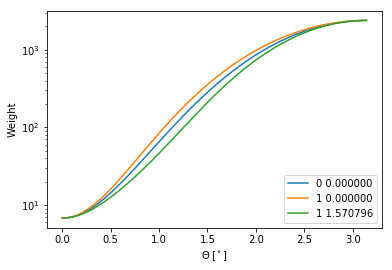

In [39]:

energy=2
for p,psi in [(0,0),(1,0),(1,np.pi/2)]:
    Thetas=np.linspace(0,np.pi,1000)
    weight=[]
    for theta in Thetas:
        weight.append(weight_prime(energy,theta,psi,p))
    plt.plot(Thetas,np.array(weight),label="%d %f"%(p,psi))
plt.legend(loc='lower right')
plt.yscale('log')
plt.ylabel('Weight')
plt.xlabel(r'$\Theta\;[^\circ]$')



In [40]:
#compton scattering 



def compton_scattering (v,f,p,energy):
#f is the polarization vector
#p is the polarization fraction 
    vnew=getv()
    c=3E8
    me=.511 #MeV
    
    v_normalized=v/length(v)
    #equation 34
    THETA=math.acos(np.dot(v,vnew)/(length(v)*length(vnew)))
    #equation 33
    #energy is in units of MeV
    epsilon=energy/(me)
    epsilon_prime=compton_formula(THETA,epsilon)
    
    #equation 23
    if p>=0:
        e1=f
    else:
        e1=np.cross(np.cross(vnew,v),v)/length(np.cross(vnew,v))
    e2=np.cross(v_normalized,e1)
    e3=v_normalized
    #print("e1=",e1)
    #print("e2=",e2)
    #print("e3=",e3)
    #equation 24
    b_perpendicular=np.cross(v/length(v),vnew/length(vnew))/length(np.cross(v,vnew))
    b_parrallel=np.cross(b_perpendicular,vnew)
    b3=vnew
    
    psi=np.arccos(np.dot(e1,e2)) #caluclautes psi
    
    #equation 25
    I=1
    Q=p*math.cos(2*psi)
    U=-p*math.sin(2*psi)
    IQU=np.array([I,Q,U])
      
    #equation 26
    IQU_prime=fano(THETA,epsilon_prime,epsilon,IQU)
    #equation 27
    p_prime=pol_fraction(IQU_prime)
    #equation 28
    psi_prime=.5*np.arctan2(IQU_prime.item(2),IQU_prime.item(1))
    #equation 29
    f_prime=b_perpendicular*math.cos(psi_prime)+np.cross(b3,b_perpendicular)*math.sin(psi_prime)
    #equation 38
    sigma_kn=(2*math.pi*r0**2)*(1+epsilon)/(epsilon**2)*((2*(1-epsilon)/(1+2*epsilon)-math.log(1+2*epsilon)/epsilon))+(math.log(1+2*epsilon)/2*epsilon)-(1+3*epsilon)/(1+2*epsilon)**2
    #equation 37
    weight_prime=(4*math.pi*IQU_prime[0])/sigma_kn
    
    return f_prime,epsilon_prime,p_prime,vnew,weight_prime,psi,psi_prime

In [2]:
def Integrating(h,n_lambda,v,x,epsilon):
#h=.033 #starting step size
    
    integral=0.0 
    oldintegral=0.0
    s=.95 #saftey factor
    #epsilon=1E-6 #desired relative accuracy
     #x starting point
    star_radius=1E12
    #lv=3E10
    #v=np.array([lv*math.cos(phi),lv*math.sin(phi),0]) #velocity vector
    
    #n_lambda=.00017098 #number of mean free paths
    lv=length(v) #length of v
    
    xpoints=[]
    integralold=[]
    integralnew=[]
    listdelta=[]
    hlist=[]
    alambda=[]
    blist=[]
    while integral < n_lambda:
        
        points=[x+a*h*v for a in aS] #calculates diffrent vectors for each a
        
        radii=np.array([length(p) for p in points]) #calculates the length of each vector units cm
        
        rho=densityAndVelocity(100,1000,1E12,1E-8,radii)
        
        invlambda=1/LambdaX(rho,sigma)
        
        #print("sigma=",sigma)
        #print("rho=",rho)
        #print("invlambda=",invlambda)
        ks=lv*h*invlambda 
        
        delta=abs(np.dot((cS-cSstar),ks))
        
        
        
        newintegral=integral+ np.dot(ks,cS)
        
        
    
        delta0=epsilon*newintegral
    
        
    #caluclates how h should be changed
        
        if delta0 >= delta:
            if delta < .001*delta0:
                delta = .001*delta0
                
                
            h=h*s*(delta0/delta)**(1/5)
            
        else :
            h=h*s*(delta0/delta)**(1/4)
            continue
    #ldx=h*length(v)
        xpoints.append(length(x))
        
        
        integral=newintegral
        integralnew.append(newintegral)
        listdelta.append(delta)
        hlist.append(h)
        
        x=x+h*v
    #oldintegral += ldx/LambdaX(density(velocity(100,1000,1E12,1E-8,length(x)),1E-8,length(x)))
        #a=np.array(wind.LambdaX(sd.density(100,1000,1E12,1E-8,sd.length(x)),1E-8,sd.length(x))))
    #integralold.append(oldintegral)
        #alambda.append(a)
    
    
    
        #b=np.array(sd.length(x0-x))
        #blist.append(b)
    #breaks the loop if the photon does not interact 
        #if length(x) <=1E12:
            #print("hit star")
            #break 
        #if length(x) > 1E13:
           # print("escaped")
            #break
    #print(integralnew) 
        status="scattered"
        if length(x) < star_radius:
            status= "hit star"
            print("hit star")
            break
        elif length(x) > 1e14: 
            status="escaped"
            print("escaped")
            break
    return integralnew,x,status

In [42]:
def getv():
    theta=math.acos(2*np.random.random()-1) #theta is from -1 to 1
    phi=2*math.pi*np.random.random() #phi is from 0 to 2pi
    
    lv=3E10
    v=np.array([lv*math.sin(theta)*math.cos(phi),lv*math.sin(theta)*math.sin(phi),lv*math.cos(theta)])
    return v

In [43]:
#all new intzilization factors 
#pick an energy 
#energy=3E-3 *np.random.random()
energy=2.4E-3 #MeV
r0=2.818E-15
#v=getv()
v=3e10*np.array([-.707,.707,0])
w=1
h=.033 #intail step length
x=np.array([1.5E12,0,0]) #position 

pol_fraction=0
pol_vector=np.zeros(3)


xgraph=[]
ygraph=[]
zgraph=[]

for index in range(5):
#n_lambda=.00017098
    n_lambda=1E-4 * -math.log(np.random.random()) #equation 7
    
    sigma=sd.interpolated_data(data,energy)
    integralnew,x,status=Integrating(h,n_lambda,v,x)
    print ("final integral=",integralnew[-1])
    if status!="scattered":
        break
    w=w*sd.interpolated_weighteddata(data,energy) #for scatering prob.
    #new coordinate systems
    #f equals zero at first 
    #we then caluclate a new f using 
    pol_vector,energy,pol_fraction,v,w_prime,THETA=compton_scattering (v,pol_vector,pol_fraction,energy)
    w*=w_prime
    
    
    
    
    
    print("weight=",w)
    
    print("n_lambda=",n_lambda)
    print("energy=",energy)
    print("v=",v)
    print(x)
    
    xgraph.append(x[0])
    ygraph.append(x[1])
    zgraph.append(x[2])
    #plt.plot(x[0],x[1],'*')
    
    plt.plot(math.cos(THETA),energy,'.')
    
    
#plt.plot(xgraph,ygraph,'-')    
plt.show()    

final integral= 0.0004643648658837063


TypeError: 'int' object is not callable

In [50]:
#equation 38
def sigma_kn(epsilon):
    return 2*math.pi*r0**2*\
    (
        (1+epsilon)/(epsilon**2)*\
            (
                2*(1+epsilon)/(1+2*epsilon)-\
                math.log(1+2*epsilon)/epsilon
            )+\
        math.log(1+2*epsilon)/(2*epsilon)-(1+3*epsilon)/(1+2*epsilon)**2
    )

                
                                                        
                                                        
                                                        
                                                        
                                                        
                                                        
                                                        
                        

In [51]:
THETA=45*math.pi/180
epsilon=1
epsilon_prime=epsilon/(1+epsilon*(1-np.cos(THETA)))
print(epsilon_prime)

0.7734590803390136
